## City weather condition: Openweathermap API and Citipy

In [1]:
import pandas as pd
import numpy as np
import csv
import os
import random
import time
import requests as rq
from citipy import citipy
import openweathermapy.core as ow
import matplotlib.pyplot as plt
import seaborn as sns

os.system('touch weather_data.csv')

api_key = '76e147c91ea53be5e87ab63c2580c3ea'
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# Building dataframe structure

columns = ['lat','lon','City','Country','Temp (F)','Humidity (%)','Cloudiness (%)','Wind_Speed (mph)','Latitude','Longitude']
index = np.arange(2000)
coor_df = pd.DataFrame(columns=columns, index=index)

# Randomly generating unique latitide and longtitude coordinates.

seen = set()

for index, row in coor_df.iterrows():
    x,y = random.randint(-90, 90),random.randint(-180, 180)
    while len(seen) < 500:
        while (x, y) in seen:
            x,y = random.randint(-90, 90),random.randint(-180, 180)
        seen.add((x, y))
    coor_df.loc[index,'lat'] = x
    coor_df.loc[index,'lon'] = y


In [2]:
coor_df.head()

,lat,lon,City,Country,Temp (F),Humidity (%),Cloudiness (%),Wind_Speed (mph),Latitude,Longitude
0,76,-67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-12,-83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-11,-112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-23,-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75,-110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for index, row in coor_df.iterrows():
    city = citipy.nearest_city(coor_df.loc[index,'lat'],coor_df.loc[index,'lon'])
    coor_df.loc[index,'City'] = city.city_name
    coor_df.loc[index,'Country'] = city.country_code

In [21]:
coor_df.head()

,lat,lon,City,Country,Temp (F),Humidity (%),Cloudiness (%),Wind_Speed (mph),Latitude,Longitude
0,76,-67,narsaq,gl,NaN,NaN,NaN,NaN,NaN,NaN
1,-12,-83,huarmey,pe,NaN,NaN,NaN,NaN,NaN,NaN
2,-11,-112,puerto ayora,ec,NaN,NaN,NaN,NaN,NaN,NaN
3,-23,-29,caravelas,br,NaN,NaN,NaN,NaN,NaN,NaN
4,75,-110,yellowknife,ca,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
len(coor_df['City'])

2000

In [22]:
citydf = coor_df.drop_duplicates(subset='City')
citydf.head()

,lat,lon,City,Country,Temp (F),Humidity (%),Cloudiness (%),Wind_Speed (mph),Latitude,Longitude
0,76,-67,narsaq,gl,NaN,NaN,NaN,NaN,NaN,NaN
1,-12,-83,huarmey,pe,NaN,NaN,NaN,NaN,NaN,NaN
2,-11,-112,puerto ayora,ec,NaN,NaN,NaN,NaN,NaN,NaN
3,-23,-29,caravelas,br,NaN,NaN,NaN,NaN,NaN,NaN
4,75,-110,yellowknife,ca,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Checking to see after dropping all the duplicates that there are still at least 500 records.

len(citydf['City'])

737

In [24]:
# Resetting the table row index (since after the removal of duplicates, the row index might not be sequential.

citydf = citydf.reset_index()
citydf.head()

,level_0,index,lat,lon,City,Country,Temp (F),Humidity (%),Cloudiness (%),Wind_Speed (mph),Latitude,Longitude
0,0,0,76,-67,narsaq,gl,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,-12,-83,huarmey,pe,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,-11,-112,puerto ayora,ec,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,-23,-29,caravelas,br,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,75,-110,yellowknife,ca,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking to see it's still the same number of rows after the re-indexing.

len(citydf['City'])

737

In [10]:
# Interating through the rows and retrieving weather data from the weather API.
# For everyone 50 rows, forcing a wait time of 10 seconds so not to exceed API call limit, which is 60 requests within a min.

api_log = []
row_count = 1

for index, row in citydf.iterrows(): 
    
    weather_api = query_url + citydf.loc[index,'City'] 
    
    if row_count <=50:
        weather_data = rq.get(weather_api).json()
        api_log.append({'URL for City': weather_api})
        
        temp_data = weather_data['main']['temp']
        humid_data = weather_data['main']['humidity']
        cloud_data = weather_data['clouds']['all']
        wind_data = weather_data['wind']['speed']
        lat_data = weather_data['coord']['lat']
        lon_data = weather_data['coord']['lon']
        
        citydf.loc[index,'Temp (F)'] = temp_data
        citydf.loc[index,'Humidity (%)'] = humid_data
        citydf.loc[index,'Cloudiness (%)'] = cloud_data
        citydf.loc[index,'Wind_Speed (mph)'] = wind_data
        citydf.loc[index,'Latitude'] = lat_data
        citydf.loc[index,'Longitude'] = lon_data
        
        row_count =+ 1
    
    else:
        
        row_count = 1
        time.sleep(10)

In [11]:
citydf.head()

,index,lat,lon,City,Country,Temp (F),Humidity (%),Cloudiness (%),Wind_Speed (mph),Latitude,Longitude
0,0,76,-67,narsaq,gl,51.8,53,20,6.93,60.92,-46.05
1,1,-12,-83,huarmey,pe,65.8,67,0,3.6,-10.07,-78.15
2,2,-11,-112,puerto ayora,ec,75.2,60,75,18.34,-0.74,-90.35
3,3,-23,-29,caravelas,br,75.07,97,56,16.58,-17.71,-39.25
4,4,75,-110,yellowknife,ca,46.4,75,20,10.29,62.46,-114.35


In [12]:
# Checking to make sure the log captured the URL calls.

api_log

[{'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=narsaq'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=huarmey'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=puerto ayora'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=caravelas'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=yellowknife'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=kapaa'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/weather?appid=76e147c91ea53be5e87ab63c2580c3ea&units=imperial&q=lorengau'},
 {'URL for City': 'http://api.openweathermap.org/data/2.5/we

In [13]:
citydf.to_csv('weather_data.csv')

# Scatter plots for weather data

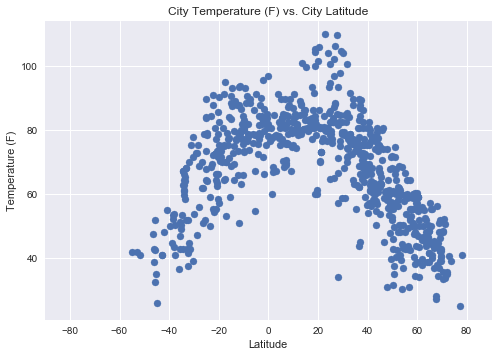

In [14]:
# Scatter plot for Temp vs Latitude

plt.scatter(citydf['Latitude'],citydf['Temp (F)'])
plt.title('City Temperature (F) vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim([-90,90])

plt.savefig('Temp vs Lat.png')

plt.show()

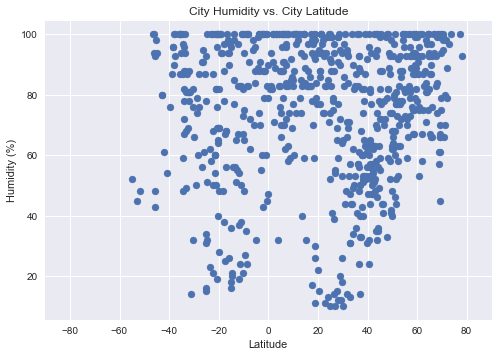

In [15]:
# Scatter plot for Humidity vs Latitude

plt.scatter(citydf['Latitude'],citydf['Humidity (%)'])
plt.title('City Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim([-90,90])

plt.savefig('Humidity vs Lat.png')

plt.show()

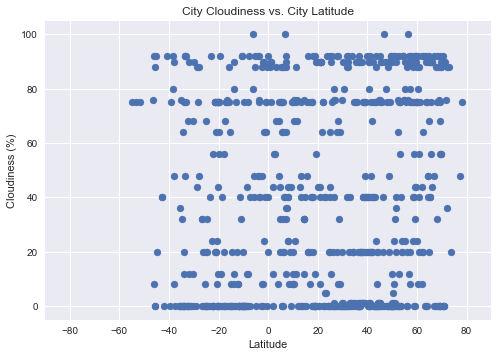

In [16]:
# Scatter plot for Cloudiness vs Latitude

plt.scatter(citydf['Latitude'],citydf['Cloudiness (%)'])
plt.title('City Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim([-90,90])

plt.savefig('Cloudiness vs Lat.png')

plt.show()

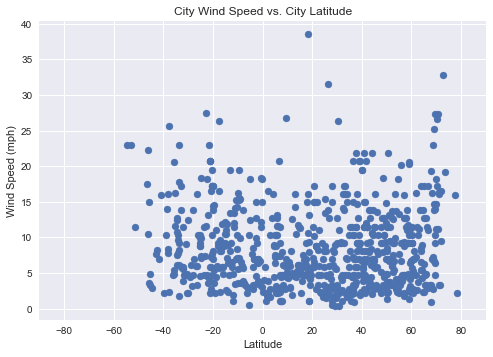

In [17]:
# Scatter plot for Wind speed vs Latitude

plt.scatter(citydf['Latitude'],citydf['Wind_Speed (mph)'])
plt.title('City Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim([-90,90])

plt.savefig('Wind Speed vs Lat.png')

plt.show()